In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, norm, poisson
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statistics import mean

### Construct the model

$$Y=\beta X_1+\varepsilon_y$$
$$X_1 \sim \mathcal{N}(\mu_1,1)$$
$$X_2=\alpha X_1+\varepsilon_2$$
$$\varepsilon_2 \sim \mathcal{N}(0,1)$$
$$\varepsilon_y \sim \mathcal{N}(0,1)$$

$$\tilde{P}^{\mu_1,\alpha,\beta}(dX_1,dX_2,dY)=P^{\mu_1}(dX_1)W_{X_1}^{\alpha}(dX_2)Q_{X_1}^{\beta}(dy)$$

In [20]:
# original risk function 
def riskf(n):
    X1=[]
    X2=[]
    Y=[]
    for i in range(n):
        mu1=np.random.normal(0, 1, 1)
        alpha=np.random.normal(0, 1, 1)
        beta=np.random.normal(0, 1, 1)
        X1.append(np.random.normal(mu1, 1, 1))
        X2.append(alpha*X1[i]+np.random.normal(0, 1, 1))
        Y.append(beta*X1[i]+np.random.normal(0, 1, 1))
    X=np.hstack([X1, X2])
    y=np.hstack([Y])
    reg=LinearRegression().fit(X, y)
    pred=reg.predict(X)
    return sum((Y-pred)**2)/n

# h acts on the mean of X1
def riskf1(n):
    X1=[]
    X2=[]
    Y=[]
    for i in range(n):
        mu1=np.random.normal(0, 1, 1)
        alpha=np.random.normal(0, 1, 1)
        beta=np.random.normal(0, 1, 1)
        X1.append(np.random.normal(h*mu1, 1, 1))
        X2.append(alpha*X1[i]+np.random.normal(0, 1, 1))
        Y.append(beta*X1[i]+np.random.normal(0, 1, 1))
    X=np.hstack([X1, X2])
    y=np.hstack([Y])
    reg=LinearRegression().fit(X, y)
    pred=reg.predict(X)
    return sum((Y-pred)**2)/n

# h acts on the varaince of X2
def riskf2(n):
    X1=[]
    X2=[]
    Y=[]
    for i in range(n):
        mu1=np.random.normal(0, 1, 1)
        alpha=np.random.normal(0, 1, 1)
        beta=np.random.normal(0, 1, 1)
        X1.append(np.random.normal(mu1, 1, 1))
        X2.append(np.random.normal(alpha*mu1, h*((alpha**2+1)**0.5)))
        Y.append(beta*X1[i]+np.random.normal(0, 1, 1))
    X=np.hstack([X1, X2])
    y=np.hstack([Y])
    reg=LinearRegression().fit(X, y)
    pred=reg.predict(X)
    return sum((Y-pred)**2)/n

# h acts on the mean of X1 and the varaince of X2

def riskf3(n):
    X1=[]
    X2=[]
    Y=[]
    for i in range(n):
        mu1=np.random.normal(0, 1, 1)
        alpha=np.random.normal(0, 1, 1)
        beta=np.random.normal(0, 1, 1)
        X1.append(np.random.normal(h*mu1, 1, 1))
        X2.append(np.random.normal(alpha*mu1, h*((alpha**2+1)**0.5)))
        Y.append(beta*X1[i]+np.random.normal(0, 1, 1))
    X=np.hstack([X1, X2])
    y=np.hstack([Y])
    reg=LinearRegression().fit(X, y)
    pred=reg.predict(X)
    return sum((Y-pred)**2)/n

In [26]:
h=10

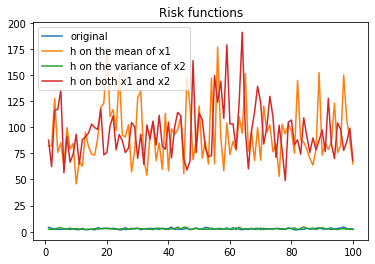

In [27]:
list1=[]
list2=[]
list3=[]
list4=[]
for i in range(100):
    list1.append(riskf(100))
    list2.append(riskf1(100))
    list3.append(riskf2(100))
    list4.append(riskf3(100))
plt.figure()    
plt.plot(range(1,101),list1,label='original')
plt.plot(range(1,101),list2,label='h on the mean of x1')
plt.plot(range(1,101),list3,label='h on the variance of x2')
plt.plot(range(1,101),list4,label='h on both x1 and x2')
plt.legend(loc='best')
plt.title("Risk functions") 
plt.show()